# Task 1. Experimental time complexity analysis

In [1]:
# imports
import time
import random
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

### Const & Algorithms functions

In [55]:
# const
N = 2000
NUM_RUNS = 5

# functions
# 1. Constant function
def constant_function(arr):
    return np.ones_like(arr)

# 2. The sum of elements
def elements_sum(arr):
    return sum(arr)

# 3. The product of elements
def elements_product(arr):
    res = 1
    for elem in arr:
        res *= elem
    return res

# powering function for 4.1.
def fast_power(x, n):
    if n == 0:
        return 1
    elif n % 2 == 0:
        half_power = fast_power(x, n // 2)
        return half_power * half_power
    else:
        half_power = fast_power(x, (n - 1) // 2)
        return half_power * half_power * x
    
# 4.1. Polynomial normal method
def polynomial_normal_method(arr):
    res = 0
    x = 1.001
    for i in range(arr.shape[0]):
        res += arr[i] * fast_power(x, i)
    return res

# 4.2. Polynomial Horner method
def polynomial_horner_method(arr):
    x = 1.0001
    p = arr[-1]
    i = len(arr) - 2
    while i >= 0:
        p = p * x + arr[i]
        i -= 1
    return p

# 5. Bubble Sort
def bubble_sort(arr):
    n = arr.shape[0]
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

# 6. Quick Sort
def quick_sort(arr):
    n = arr.shape[0]
    if n <= 1:
        return arr
    pivot = arr[n // 2]
    left = arr[arr < pivot]
    middle = arr[arr == pivot]
    right = arr[arr > pivot]
    return np.concatenate([quick_sort(left), middle, quick_sort(right)], axis=0)

# 7. Timsort
def timsort(arr):
    return sorted(arr)

# 8. usual matrix product
def matrix_product(matrix1, matrix2):
    n = len(matrix1)
    product_output = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                product_output[i][j] += matrix1[i][k] * matrix2[k][j]
    return product_output

### Theoretical Time Comlexity

In [67]:
# O(1)
def const_time(x, c):
    return c

# O(n)
def linear_time(x, c):
    return c * x

# O(n^2)
def quadratic_time(x, c):
    return c * (x ** 2)

# O(n^3)
def cubic_time(x, c):
    return c * (x ** 3)

# O(n*log(n))
def linearithmic_time(x, c):
    return c * x * np.log(x)

### Execution Time Functions

In [69]:
def execution_time(function, n):
    times = []
    for i in range(1, n):
        temp_time = 0
        for _ in range(NUM_RUNS):
            arr = np.random.random(i)
            start_time = time.time()
            function(arr)
            end_time = time.time()
            temp_time += (end_time - start_time)
        times.append(temp_time / NUM_RUNS)
    return times

In [70]:
def execution_time_matrix_product(n):
    times = []
    for i in range(1, n + 1):
        temp_time = 0
        for _ in range(NUM_RUNS):
            matrix1 = np.random.random((i, i))
            matrix2 = np.random.random((i, i))
            start_time = time.time()
            matrix_product(matrix1=matrix1, matrix2=matrix2)
            end_time = time.time()
            temp_time += (end_time - start_time)
        times.append(temp_time / NUM_RUNS)
    return times

### Plot Functions

In [71]:
def plot_execution_time(function_main, function_theoretical, n):

    # observed part
    x_vector = np.arange(1, n)
    target_vector = execution_time(function=function_main, n=n)

    # theoretical part
    popt, pcov = curve_fit(f=function_theoretical, xdata=x_vector, ydata=target_vector, maxfev=2000)
    target_vector_theoretical = function_theoretical(x_vector, *popt)

    plt.plot(x_vector, target_vector, label="Observed")
    plt.plot(x_vector, target_vector_theoretical, label="Theoretical", color="red")
    plt.title(f"Test function - {function_main.__name__}")
    plt.xlabel("N")
    plt.ylabel("Mean Execution Time (in seconds)")
    plt.legend()
    plt.show()

In [72]:
def plot_execution_time_matrix_product(function_theoretical, n):

    # observed part
    x_vector = np.arange(1, n + 1)
    target_vector = execution_time_matrix_product(n=n)

    # theoretical part
    popt, pcov = curve_fit(f=function_theoretical, xdata=x_vector, ydata=target_vector)
    
    target_vector_theoretical = function_theoretical(x_vector, *popt)

    plt.plot(x_vector, target_vector, label="Observed")
    plt.plot(x_vector, target_vector_theoretical, label="Theoretical", color="red")
    plt.title(f"Test maxtrix product")
    plt.xlabel("N")
    plt.ylabel("Mean Execution Time (in seconds)")
    plt.legend()
    plt.show()

## First part of task

### 1.1. Constant Function

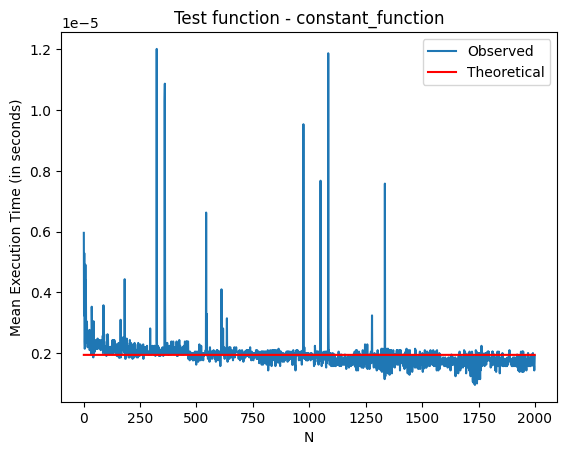

In [73]:
plot_execution_time(constant_function, const_time, N)

##### For the algorithm performing constant value of elementary operations, we found that its complexity is indeed constant, as expected.

### 1.2. The sum of elements

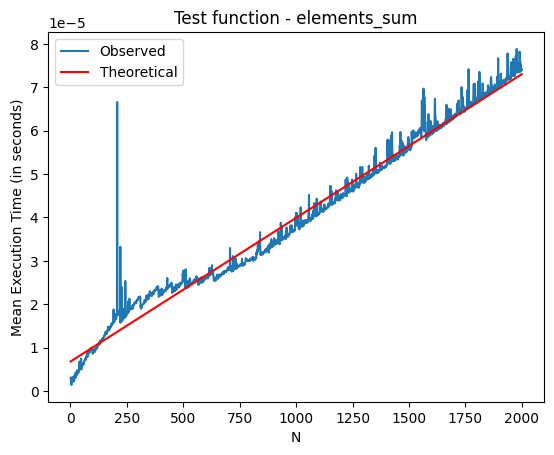

In [74]:
plot_execution_time(elements_sum, linear_time, N)

#####  When performing the sum of array elements, we observed a linear time complexity, which aligns with our expectations.

### 1.3. The product of elements

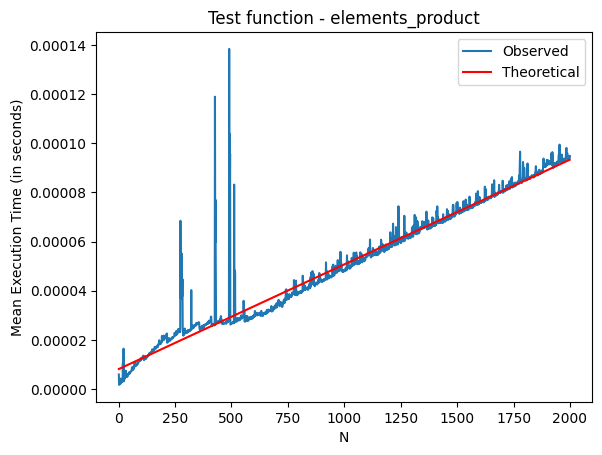

In [75]:
plot_execution_time(elements_product, linear_time, N)

##### Calculating the product of array elements led to a linear time complexity, consistent with our assumptions.

### 1.4. Polynomial calculation

#### 1.4.1. Normal polynomial calculation

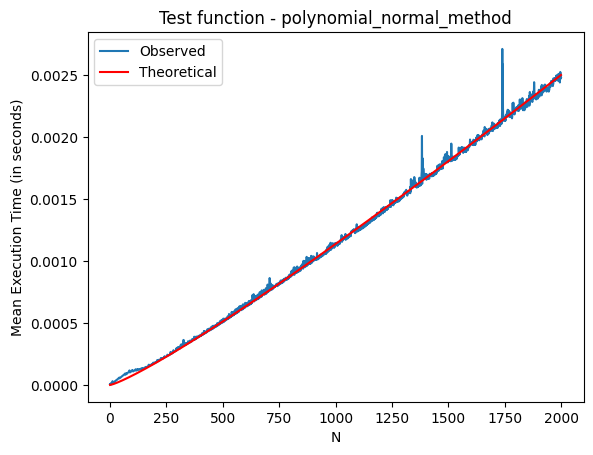

In [76]:
plot_execution_time(polynomial_normal_method, linearithmic_time, N)

##### When performing direct polynomial evaluation, the time complexity depends on the method used for powering. To ensure determinism in our measurements, we employed binary powering as the chosen method. As a result, we observed a logarithmic-linear time complexity, consistent with our expectations.

#### 1.4.2. Horner’s method of polynomial calculation

C:\Users\matni\AppData\Local\Temp\ipykernel_14364\1800839286.py:34: RuntimeWarning: overflow encountered in scalar multiply
  res = arr[i - 1] + x * res


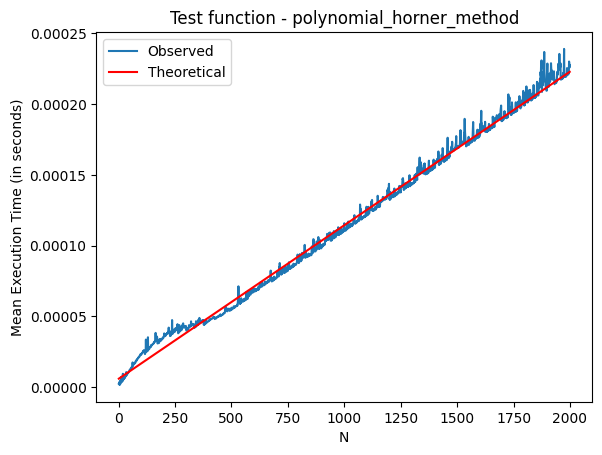

In [77]:
plot_execution_time(polynomial_horner_method, linear_time, N)

##### Employing the Horner method resulted in linear time complexity, in line with our expectations.

### 1.5. Bubble Sort

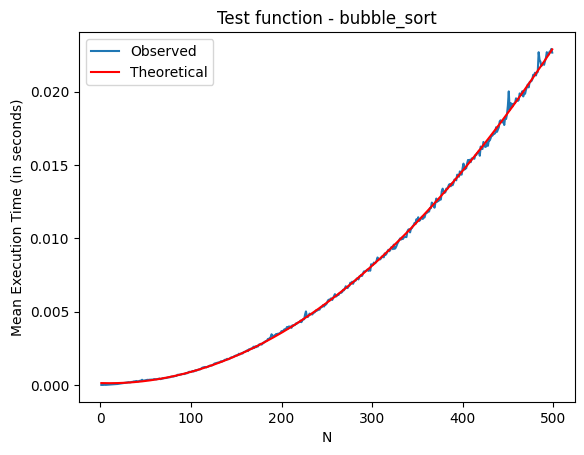

In [78]:
plot_execution_time(bubble_sort, quadratic_time, N//4)

##### During the execution of Bubble Sort, we encountered quadratic time complexity, which was expected. However, for larger values of N (>500), the execution time became too long, so we had to limit N to 500. We still observed quadratic time complexity.

### 1.6. Quick Sort

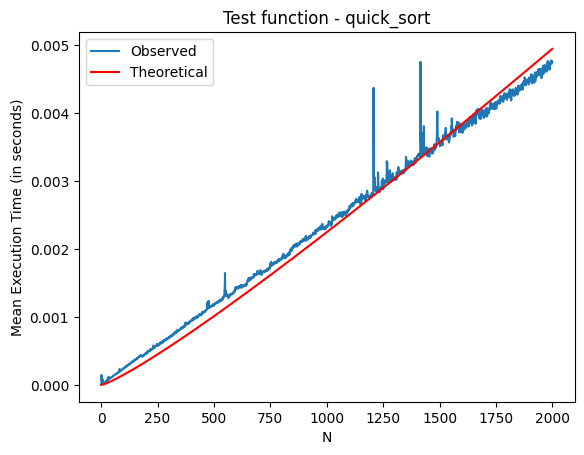

In [79]:
plot_execution_time(quick_sort, linearithmic_time, N)

##### When utilizing Quick Sort, we observed a logarithmic-linear time complexity, aligning with our expectations.

### 1.7. Timsort

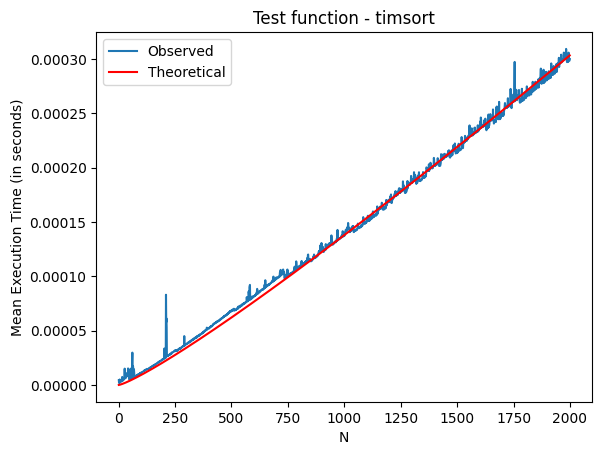

In [80]:
plot_execution_time(timsort, linearithmic_time, N)

##### In the case of Timsort, we found that it exhibited logarithmic-linear time complexity, as anticipated.

## Second part of task

### 1.1. Matrix product

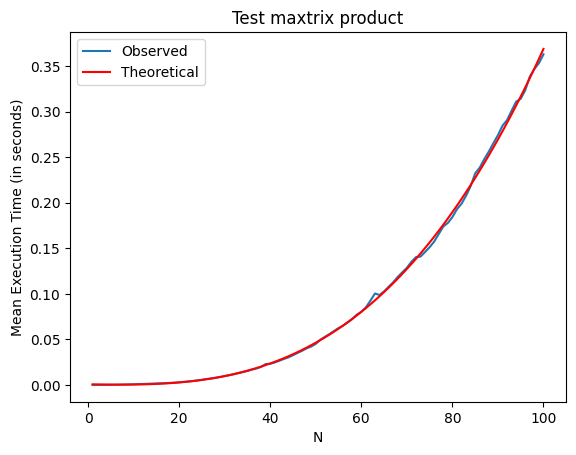

In [81]:
plot_execution_time_matrix_product(cubic_time, 100)

##### Performing matrix product operations displayed cubic time complexity (O(n^3)), in line with our expectations. However, for larger values of N (>100), the execution time became too long, so we had to limit N to 100. We still observed cubic time complexity.

## Third part of task

A data structure is a specialized format used to organize, process, retrieve, and store data. There are several fundamental and advanced types of data structures, each designed for specific data organization purposes. In programming, data structures can be chosen or crafted to store data for use with various algorithms. The most commonly employed ones include:

Array: Arrays are fundamental collections of elements of the same data type with fixed size. They offer fast direct access by index, making them crucial for algorithms like Binary Search, Quick Sort, and dynamic programming problems such as computing the Fibonacci sequence.

Linked List: These linear structures store data in nodes, each connected to the next. They dynamically adjust in size and excel in insertions and deletions. Linked lists are essential for implementing stacks, queues, and memory management algorithms.

Stack: Operating on the Last-In-First-Out (LIFO) principle, stacks are vital for tracking function calls, handling recursion, and parsing expressions. They are prominently featured in depth-first search and various backtracking algorithms.

Queue: Following the First-In-First-Out (FIFO) concept, queues are indispensable for orderly resource management. They are key components in breadth-first search and managing tasks like print jobs in operating systems.

Hash Table: Hash tables store key-value pairs, enabling rapid lookup, insertion, and deletion based on keys. They play a pivotal role in implementing dictionaries, caches, and efficient database indexing.

Set: Sets focus on maintaining distinct elements and efficiently perform operations like union, intersection, and difference. They are integral to algorithms that require the management of unique elements.

Dictionary: This abstract data type efficiently associates keys with values, facilitating quick retrieval and modification based on keys. Dictionaries are essential for tasks like data caching, symbol tables in compilers, and data serialization/deserialization.

Algorithm design technique refers to a distinct approach or mathematical method for developing algorithms and solving problems. While several algorithms can address a problem, not all of them can do so efficiently. Hence, we must create algorithms using an appropriate algorithm design technique that aligns with the nature of the problem. An algorithm crafted with the right design technique can effectively solve the problem while optimizing computational power usage. Frequently used techniques are:

Brute-force (Exhaustive Search): This technique involves exhaustively exploring all potential solutions to identify the best one. It is suitable for smaller problems or situations where optimization is not a primary concern, such as finding all possible subsets of a set.

Divide and Conquer: Divide and conquer involves breaking problems into smaller, more manageable subproblems, solving them independently, and then combining their solutions. It excels in problems with overlapping subproblems, exemplified by sorting algorithms like Merge Sort and Quick Sort.

Greedy Algorithms: Greedy algorithms make locally optimal choices at each step to achieve a globally optimal solution. They shine when the problem exhibits the greedy choice property, as seen in Dijkstra's shortest path algorithm.

Dynamic Programming: This technique dissects problems into overlapping subproblems and stores their solutions to avoid redundant computations. It is highly efficient for problems with overlapping subproblems, as demonstrated in the efficient computation of the Fibonacci sequence.

Backtracking: Backtracking explores all possible options recursively, backtracking or undoing choices that lead to dead-ends. It is well-suited for problems with multiple decision points and constraints, commonly used in solving puzzles like N-Queens and Sudoku.

